In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeRegressor as dtr

In [2]:
#path to the train data
file = 'C:/Users/HP/Downloads/Compressed/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/aa.us.txt'
data = pd.read_csv(file, parse_dates=['Date'])

In [3]:
data.head(3)

,Date,Open,High,Low,Close,Volume,OpenInt
0,1970-01-02,2.2972,2.3178,2.2972,2.2972,26437,0
1,1970-01-05,2.2972,2.2972,2.2544,2.2759,29887,0
2,1970-01-06,2.2759,2.2759,2.2342,2.2342,106900,0


In [4]:
#creating our target object y
#We picked volume becase that is the price for our stock
y = data.Volume

#creating x
values = ['Open', 'Close']
X = data[values]

In [5]:
#we then split our data into the training and validating sets
trainX, valX, trainy, valy = tts(X, y, random_state = 1)

In [6]:
#specify the model which is the DecisionTreeRegressor we imported
model = dtr(random_state = 1)

In [7]:
#then we fit the model into our data set
model.fit(trainX, trainy)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [8]:
#then we validate our predictions and calculate the error
predictions = model.predict(valX)
Mae = mae(predictions, valy)
print("Validation MAE when not specifying max_leaf_nodes: {:,.0f}".format(Mae))

Validation MAE when not specifying max_leaf_nodes: 2,456,254


In [9]:
#we will now use the best value for our max_leaf_nodes
model = dtr(max_leaf_nodes = 125, random_state = 1)
model.fit(trainX, trainy)
predictions = model.predict(valX)
Mae = mae(predictions, valy)
print("Validation MAE when not specifying max_leaf_nodes: {:,.0f}".format(Mae))

Validation MAE when not specifying max_leaf_nodes: 2,021,153


In [10]:
#we redifine the model
new_model = rfr(random_state = 1)
new_model.fit(trainX, trainy)
new_prediction = new_model.predict(valX)
new_Mae = mae(new_prediction, valy)
print("Validation MAE when not specifying max_leaf_nodes: {:,.0f}".format(new_Mae))

c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Validation MAE when not specifying max_leaf_nodes: 2,062,000


In [11]:
#we will improve more on the model
I_model = rfr(random_state = 1)

#we fit model 
I_model.fit(trainX, trainy)

c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [12]:
#now we make our predictions with the test data
p_data = 'C:/Users/HP/Downloads/Compressed/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/aan12.us.csv'
new_data = pd.read_csv(p_data, parse_dates = ['Date'])

In [13]:
#now we create a testX from the test data but with the same values with the train testX
testX = new_data[values]
#now we predict our test data
test_predict = I_model.predict(testX)

In [14]:
#saving the data
results = pd.DataFrame({'Volume': test_predict})
results.to_csv('Prediction.csv', index = False)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

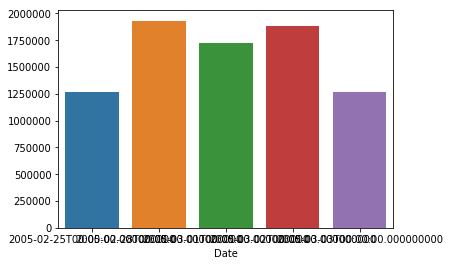

In [16]:
sns.barplot(x='Date', y=test_predict, data=new_data.head(5))

In [17]:
from datetime import datetime
j = data['Date']
# datetime.strftime(objDate,'%b %d, %Y')
# datetime.strftime(objDate,'%Y')
# objDate = datetime.strptime(j, '%m/%d/%y')
j = j.dt.strftime('%Y-%m-%d')
#datetime.strptime(row[0], "%Y-%m-%d")

In [18]:
a = j.head(4)
#a
b = data.Volume.tail(4)
b

12070    2168351
12071    3347930
12072    7671810
12073    4463839
Name: Volume, dtype: int64

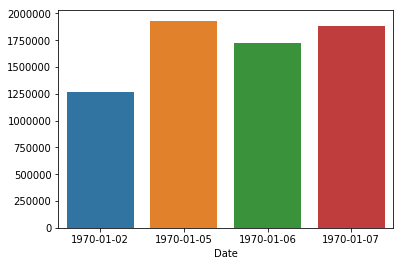

In [19]:
sns.barplot(x=a, y=test_predict, data=new_data.head(5))

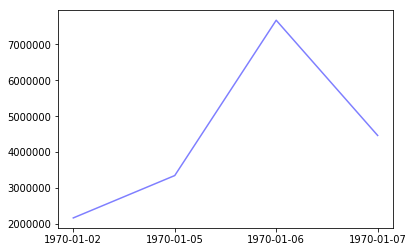

In [20]:
new = pd.DataFrame(test_predict*3)
dope = new.head(4)
#plt.plot(a, dope, c='red', alpha = 0.5)
plt.plot(a, b, c='blue', alpha = 0.5)

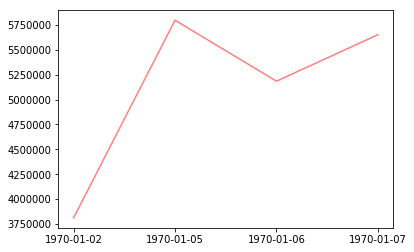

In [21]:
#plt.plot(a, test_predict.head(4), c='red', alpha = 0.5)
new = pd.DataFrame(test_predict)
new.head(3)
plt.plot(a, dope, c='red', alpha = 0.5)

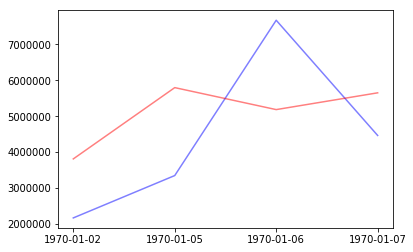

In [22]:
plt.plot(a, b, c='blue', alpha = 0.5)
plt.plot(a, dope, c='red', alpha = 0.5)

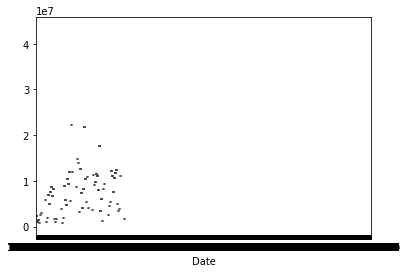

In [33]:
sns.boxplot(j, test_predict)

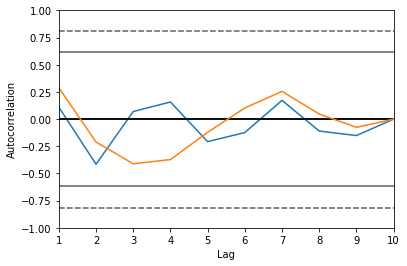

In [28]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(data['Volume'].head(10))
new = pd.DataFrame(test_predict)
autocorrelation_plot(new.head(10))

In [26]:
new = pd.DataFrame(test_predict)